In [1]:
#下面的三个cell是用于求解书面作业的代码，可以忽略
import numpy as np

In [2]:
X=np.array([[1,0.2,0.7],[1,0.3,0.3],[1,0.4,0.5],[1,0.6,0.5],[1,0.1,0.4],[1,0.4,0.6],[1,0.6,0.2],[1,0.7,0.4],[1,0.8,0.6],[1,0.7,0.5]])
X=np.matrix(X)
X_T=X.T
Y=np.array([[1],[1],[1],[1],[1],[-1],[-1],[-1],[-1],[-1]])
Y=np.matrix(Y)
W=(X_T*X).I*X_T*Y
print(W)

[[ 1.4312148 ]
 [-3.21802092]
 [ 0.24135157]]


In [3]:
Y_hat=np.sign(W.T*X_T)
print(Y_hat)

[[ 1.  1.  1. -1.  1.  1. -1. -1. -1. -1.]]


In [4]:
#以下是编程作业的代码
#生成训练数据的函数
import numpy as np
def get_data(num,expect,variation,seed):
    m=np.array(expect)
    s=np.array(variation)
    np.random.seed(seed)
    raw=np.random.multivariate_normal(m,s,num)
    return raw
def get_dataset(num,expect1,variation1,expect2,variation2,seed1,seed2,seed3):
    raw=get_data(num,expect1,variation1,seed1)
    ones=np.ones((num,1))
    aug_data=np.concatenate([ones,raw],axis=1)
    labels=np.ones((num,1))
    final_data=np.concatenate([aug_data,labels],axis=1)
    raw_1=get_data(num,expect2,variation2,seed2)
    neg_labels=-np.ones((num,1))
    aug_data_1=np.concatenate([ones,raw_1],axis=1)
    final_data_1=np.concatenate([aug_data_1,neg_labels],axis=1)
    dataset=np.concatenate([final_data,final_data_1],axis=0)
    #打乱
    np.random.seed(seed3)
    np.random.shuffle(dataset)
    return dataset
source_data=get_dataset(200,[-5,0],[[1,0],[0,1]],[0,5],[[1,0],[0,1]],4,8,12)
print('show a few data:',source_data[0:4])
print('shape of dataset:',source_data.shape)



show a few data: [[ 1.         -0.88516841  4.05597354 -1.        ]
 [ 1.          1.01411068  7.22260127 -1.        ]
 [ 1.          0.73561887  4.9440911  -1.        ]
 [ 1.         -5.99590893  0.69359851  1.        ]]
shape of dataset: (400, 4)


In [5]:
#数据集划分
train_set=source_data[0:320]
test_set=source_data[320:]

In [6]:
#算法1，广义逆算法
def generilized_inverse(training_set):
    X=np.matrix(training_set[:,0:3])
    Y=np.matrix(training_set[:,3]).T
    w=(X.T*X).I*X.T*Y
    return w

In [7]:
#算法2，梯度下降
def gradient_descent(train_set,learning_rate,rand_init=True,error=1e-5,max_iter=20):
    X=np.matrix(train_set[:,0:3])
    Y=np.matrix(train_set[:,3]).T
    N=X.shape[0]
    loss_epoch=[]
    if rand_init==True:
        w=np.random.normal(0,1,3)
    else:
        w=np.array([0,0,0])
    w=np.matrix(w).T
    for i in range(max_iter):
        loss=(np.linalg.norm(X*w-Y)**2)/N
        loss_epoch.append(loss)
        gradient=(X.T*X*w-X.T*Y)*2/N
        if np.linalg.norm(gradient)<=error:
            break
        w=w-learning_rate*gradient
    return w,loss_epoch

In [8]:
#测试函数
def eval(test_set,weight):
    error_rate=0
    weight=np.squeeze(weight) 
    for j in range(test_set.shape[0]):
        if np.dot(weight,test_set[j,0:-1])*test_set[j][-1]<0:
            error_rate+=1
    print('正确率为:{}%'.format((1-error_rate/test_set.shape[0])*100))

In [9]:
#分别测试两个算法
w1=generilized_inverse(train_set)
print('下面测试算法一训练集')
eval(train_set,w1)
print('下面测试算法一测试集')
eval(test_set,w1)
w2,loss=gradient_descent(train_set,0.01,False,1e-5)
print('下面测试算法二训练集')
eval(train_set,w2)
print('下面测试算法二测试集')
eval(test_set,w2)

下面测试算法一训练集
正确率为:100.0%
下面测试算法一测试集
正确率为:100.0%
下面测试算法二训练集
正确率为:100.0%
下面测试算法二测试集
正确率为:100.0%


In [10]:
#画图函数
#从上一次作业照搬过来
import matplotlib.pyplot as plt
def draw(dataset, weight):
    x_po= []
    y_po= []
    x_ne= []
    y_ne= []
    for i in range(dataset.shape[0]):
        if dataset[i][-1] == 1:
            x_po.append(dataset[i][1])
            y_po.append(dataset[i][2])
        elif dataset[i][-1] == -1:
            x_ne.append(dataset[i][1])
            y_ne.append(dataset[i][2])

    x_line=np.linspace(-9, 9, 100)
    y_line = -(weight[1] / weight[2]) * x_line + weight[0] / weight[2]
    plt.scatter(x_po, y_po, color='red', s=50, label='positive')
    plt.scatter(x_ne, y_ne, color='green', s=50, label='negative')
    plt.plot(x_line, y_line, color='yellow', label='boundary')
    plt.legend(loc='best')
    plt.show()

算法一，训练集


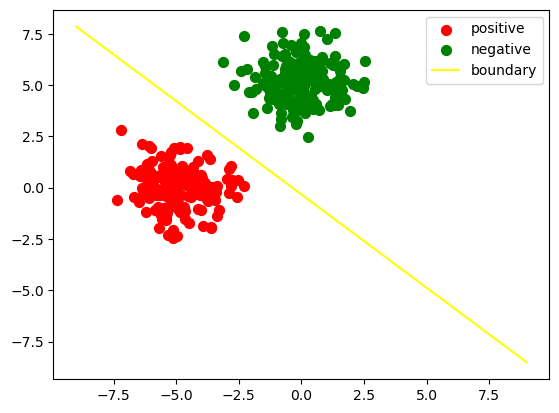

算法一，测试集


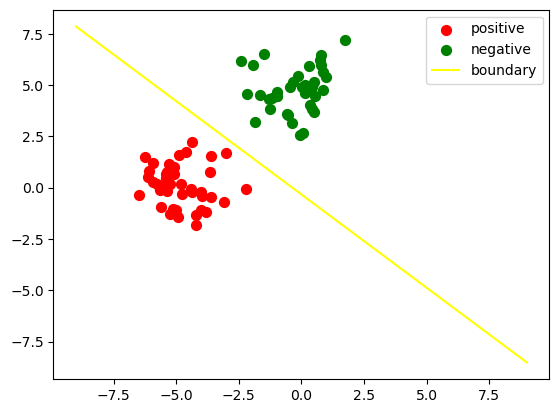

算法二，训练集


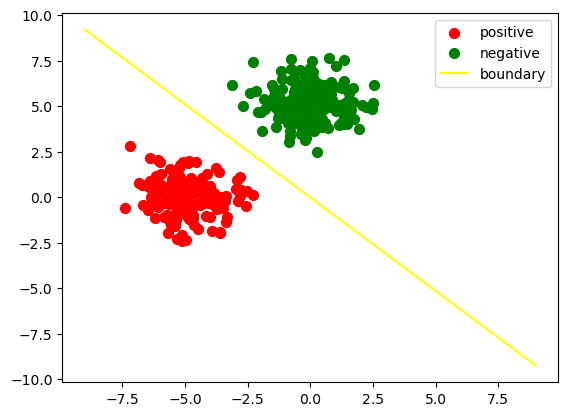

算法二，测试集


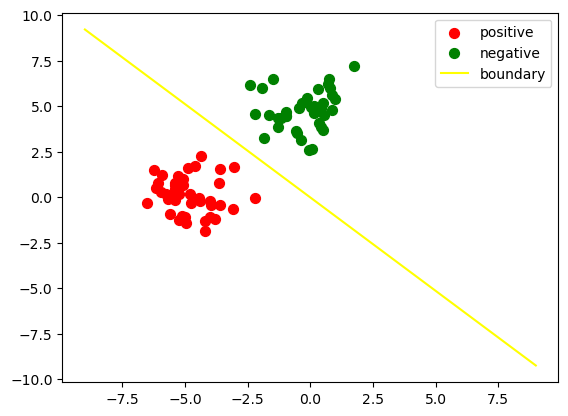

In [11]:
print('算法一，训练集')
draw(train_set,np.array(w1))
print('算法一，测试集')
draw(test_set,np.array(w1))
print('算法二，训练集')
draw(train_set,np.array(w2))
print('算法二，测试集')
draw(test_set,np.array(w2))

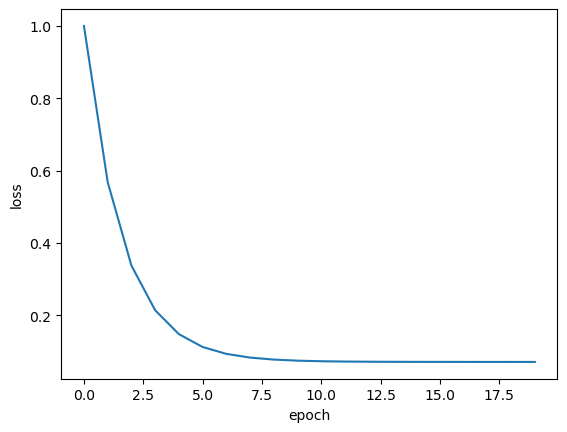

In [12]:
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

下面测试算法一训练集
正确率为:75.9375%
下面测试算法一测试集
正确率为:72.5%
下面测试算法二训练集
正确率为:75.625%
下面测试算法二测试集
正确率为:73.75%
算法一，训练集


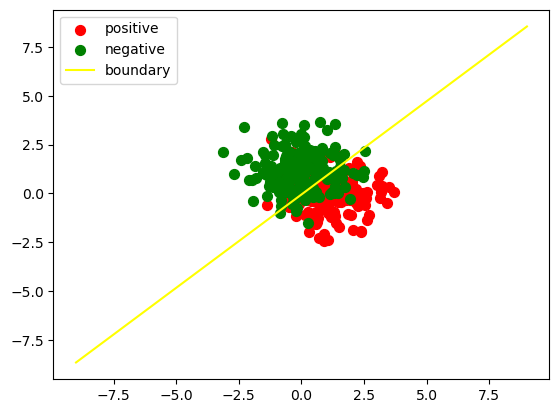

算法一，测试集


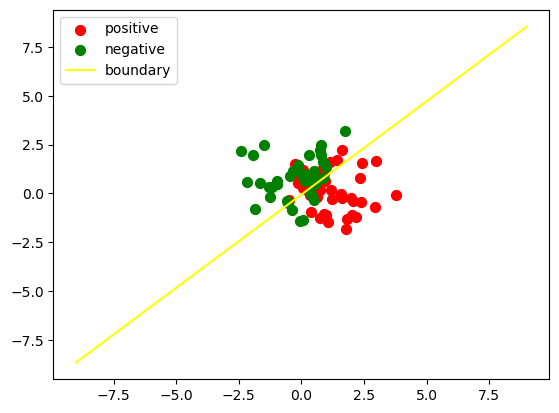

算法二，训练集


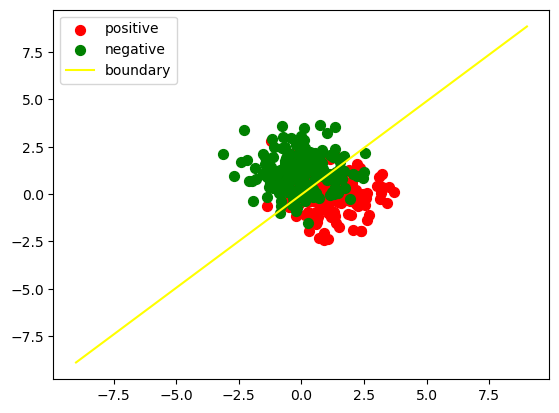

算法二，测试集


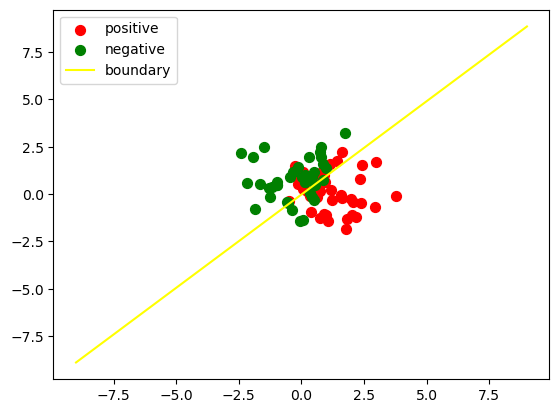

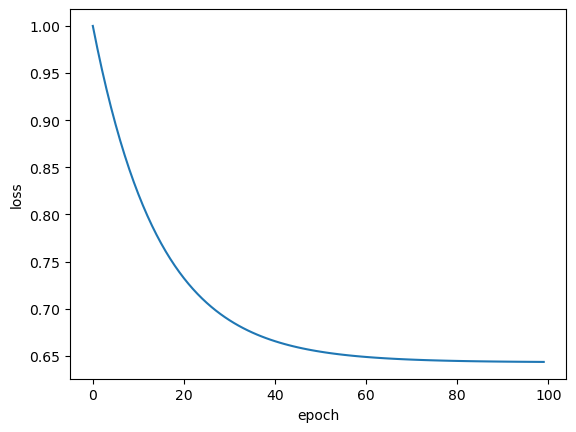

In [13]:
#样本分布改变之后
#数据生成
source_data=get_dataset(200,[1,0],[[1,0],[0,1]],[0,1],[[1,0],[0,1]],4,8,12)
#数据集划分
train_set=source_data[0:320]
test_set=source_data[320:]
#分别测试两个算法
w1=generilized_inverse(train_set)
print('下面测试算法一训练集')
eval(train_set,w1)
print('下面测试算法一测试集')
eval(test_set,w1)
w2,loss=gradient_descent(train_set,0.01,False,1e-5,100)
print('下面测试算法二训练集')
eval(train_set,w2)
print('下面测试算法二测试集')
eval(test_set,w2)
print('算法一，训练集')
draw(train_set,np.array(w1))
print('算法一，测试集')
draw(test_set,np.array(w1))
print('算法二，训练集')
draw(train_set,np.array(w2))
print('算法二，测试集')
draw(test_set,np.array(w2))
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

下面测试算法二训练集
正确率为:75.625%
下面测试算法二测试集
正确率为:72.5%
算法二，训练集


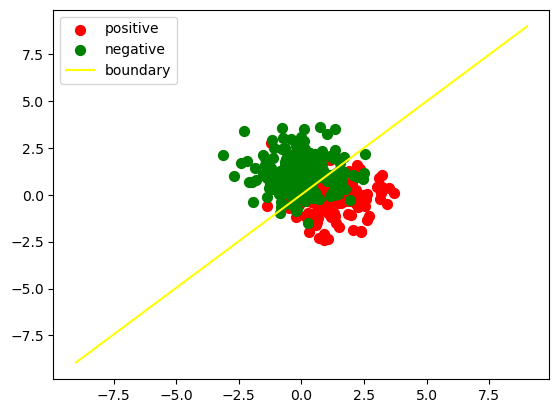

算法二，测试集


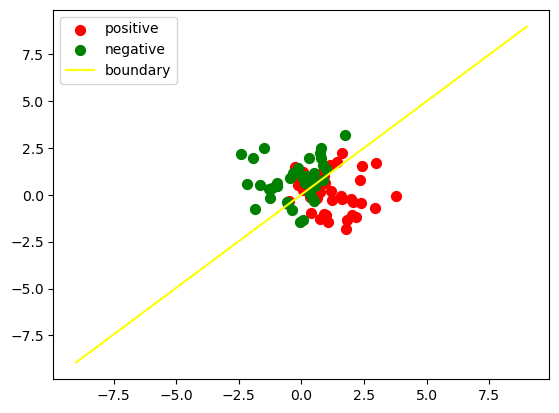

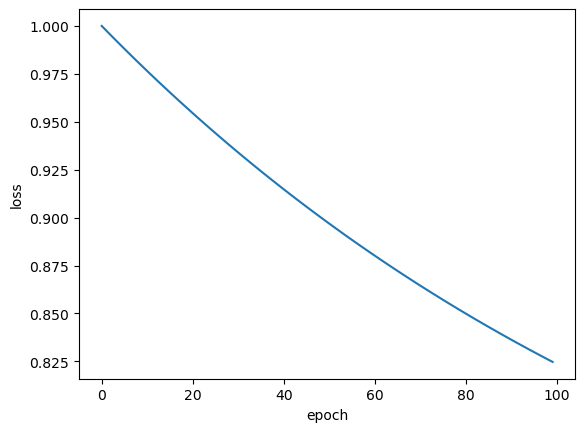

In [14]:
#改变学习率
#数据生成
source_data=get_dataset(200,[1,0],[[1,0],[0,1]],[0,1],[[1,0],[0,1]],4,8,12)
#数据集划分
train_set=source_data[0:320]
test_set=source_data[320:]
#算法二
w2,loss=gradient_descent(train_set,0.001,False,1e-5,100)
print('下面测试算法二训练集')
eval(train_set,w2)
print('下面测试算法二测试集')
eval(test_set,w2)
print('算法二，训练集')
draw(train_set,np.array(w2))
print('算法二，测试集')
draw(test_set,np.array(w2))
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

下面测试算法二训练集
正确率为:75.9375%
下面测试算法二测试集
正确率为:73.75%
算法二，训练集


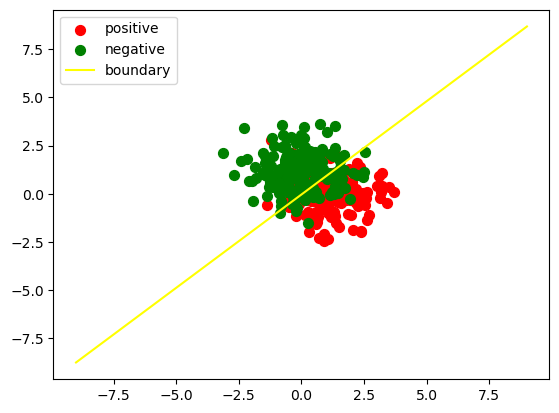

算法二，测试集


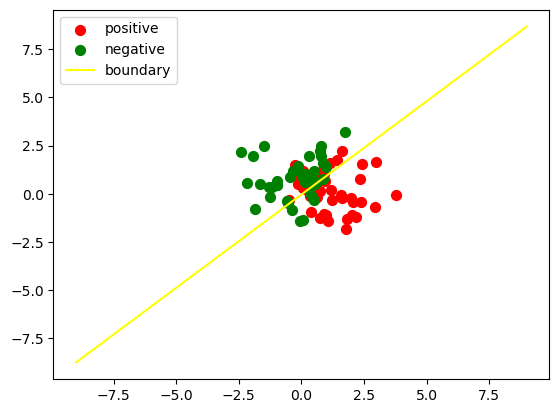

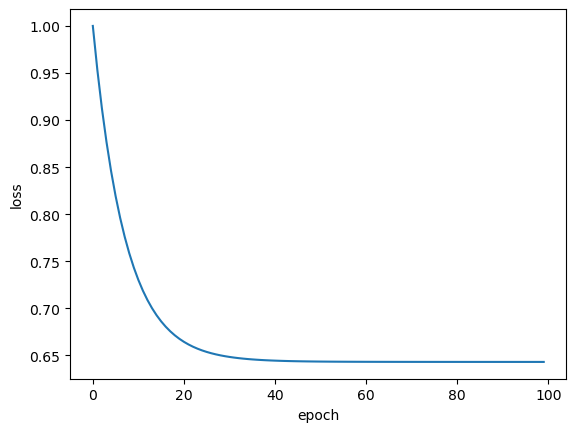

In [15]:
#改变学习率
#数据生成
source_data=get_dataset(200,[1,0],[[1,0],[0,1]],[0,1],[[1,0],[0,1]],4,8,12)
#数据集划分
train_set=source_data[0:320]
test_set=source_data[320:]
#算法二
w2,loss=gradient_descent(train_set,0.02,False,1e-5,100)
print('下面测试算法二训练集')
eval(train_set,w2)
print('下面测试算法二测试集')
eval(test_set,w2)
print('算法二，训练集')
draw(train_set,np.array(w2))
print('算法二，测试集')
draw(test_set,np.array(w2))
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [16]:
#改变batch_size,原来相当于是以一个训练集为batch，现在改变batch大小
#算法2改进，mini-batch梯度下降
def gradient_descent_mini_batch(train_set,learning_rate,rand_init=True,error=1e-5,max_iter=20,batch_size=10):
    B=batch_size
    loss_epoch=[]
    if rand_init==True:
        w=np.random.normal(0,1,3)
    else:
        w=np.array([0,0,0])
    w=np.matrix(w).T
    for i in range(max_iter):
        loss=0
        np.random.shuffle(train_set)
        for j in range(train_set.shape[0]//B):
            X=np.matrix(train_set[B*j:B*(j+1),0:3])
            Y=np.matrix(train_set[B*j:B*(j+1),3]).T
            loss+=(np.linalg.norm(X*w-Y)**2)/B
            gradient=(X.T*X*w-X.T*Y)*2/B
            if np.linalg.norm(gradient)<=error:
                return w,loss_epoch
            w=w-learning_rate*gradient
        loss_epoch.append(loss)
    return w,loss_epoch


下面测试算法二训练集
正确率为:75.9375%
下面测试算法二测试集
正确率为:72.5%
算法二，训练集


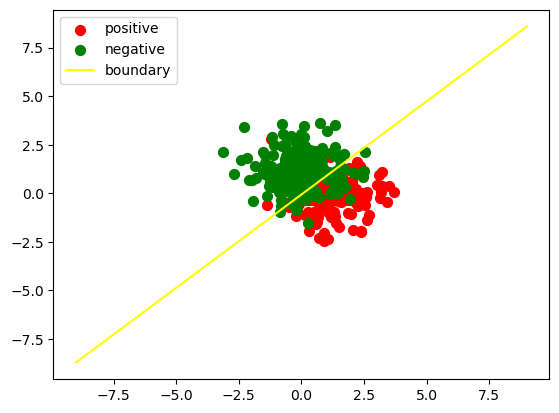

算法二，测试集


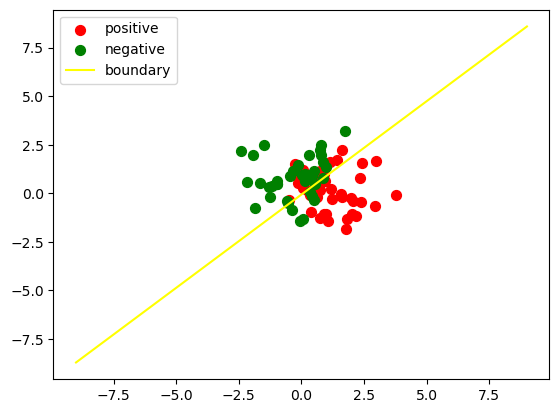

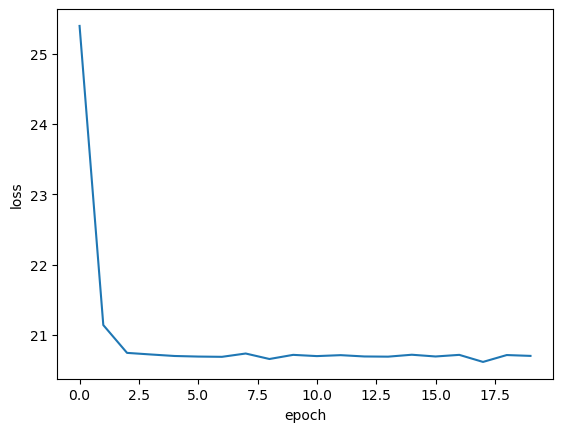

In [17]:
#以下是讨论不同的batch_size对训练过程的影响
#数据生成
source_data=get_dataset(200,[1,0],[[1,0],[0,1]],[0,1],[[1,0],[0,1]],4,8,12)
#数据集划分
train_set=source_data[0:320]
test_set=source_data[320:]
#算法二
w2,loss=gradient_descent_mini_batch(train_set,0.01,False,1e-5,20,10)
print('下面测试算法二训练集')
eval(train_set,w2)
print('下面测试算法二测试集')
eval(test_set,w2)
print('算法二，训练集')
draw(train_set,np.array(w2))
print('算法二，测试集')
draw(test_set,np.array(w2))
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

下面测试算法二训练集
正确率为:75.9375%
下面测试算法二测试集
正确率为:72.5%
算法二，训练集


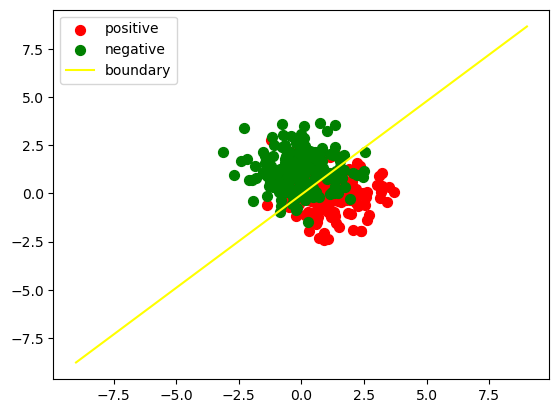

算法二，测试集


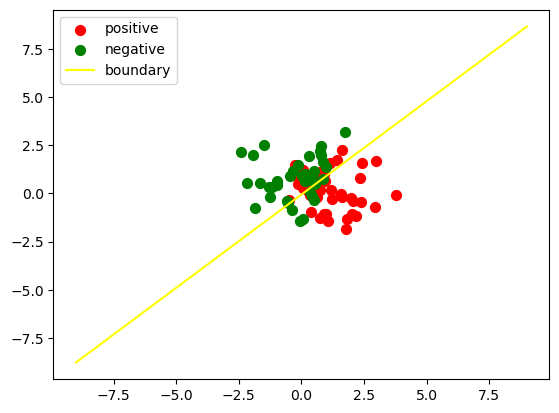

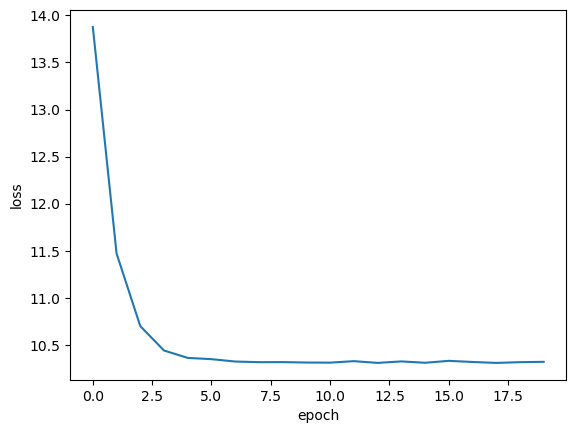

In [18]:
#数据生成
source_data=get_dataset(200,[1,0],[[1,0],[0,1]],[0,1],[[1,0],[0,1]],4,8,12)
#数据集划分
train_set=source_data[0:320]
test_set=source_data[320:]
#算法二
w2,loss=gradient_descent_mini_batch(train_set,0.01,False,1e-5,20,20)
print('下面测试算法二训练集')
eval(train_set,w2)
print('下面测试算法二测试集')
eval(test_set,w2)
print('算法二，训练集')
draw(train_set,np.array(w2))
print('算法二，测试集')
draw(test_set,np.array(w2))
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

下面测试算法二训练集
正确率为:75.625%
下面测试算法二测试集
正确率为:72.5%
算法二，训练集


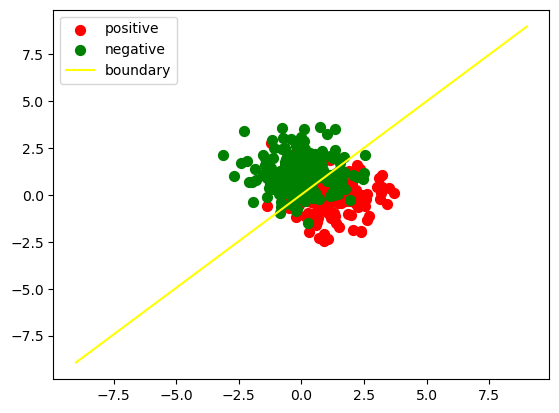

算法二，测试集


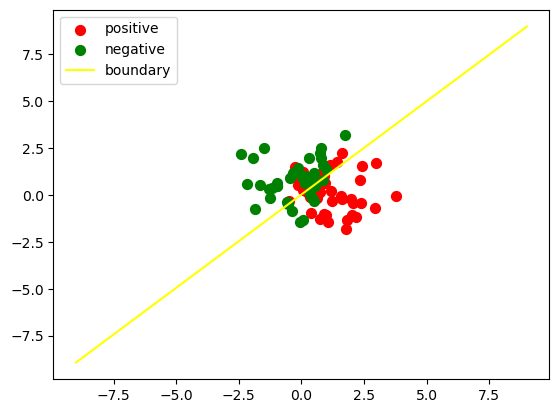

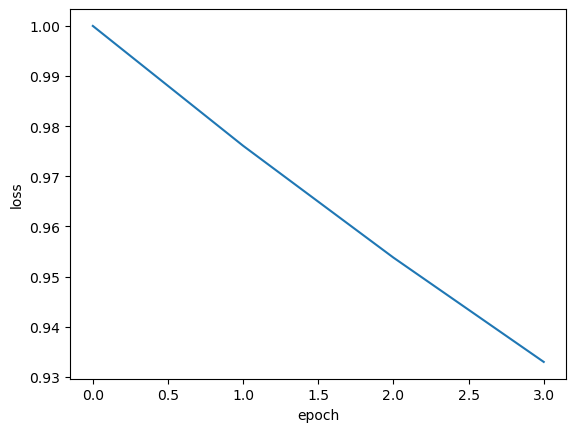

In [19]:
#以下是讨论不同的epochs对训练过程的影响
#数据生成
source_data=get_dataset(200,[1,0],[[1,0],[0,1]],[0,1],[[1,0],[0,1]],4,8,12)
#数据集划分
train_set=source_data[0:320]
test_set=source_data[320:]
#算法二
w2,loss=gradient_descent_mini_batch(train_set,0.01,False,1e-5,4,320)
print('下面测试算法二训练集')
eval(train_set,w2)
print('下面测试算法二测试集')
eval(test_set,w2)
print('算法二，训练集')
draw(train_set,np.array(w2))
print('算法二，测试集')
draw(test_set,np.array(w2))
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

下面测试算法二训练集
正确率为:75.625%
下面测试算法二测试集
正确率为:73.75%
算法二，训练集


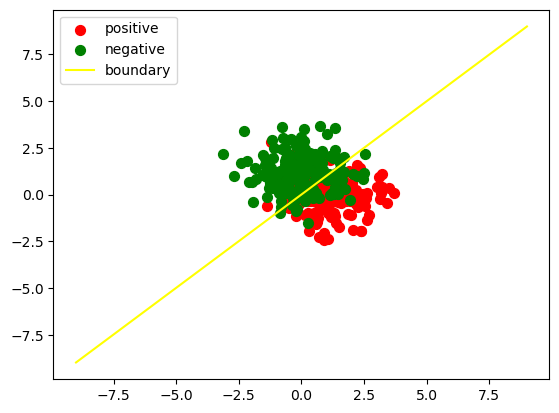

算法二，测试集


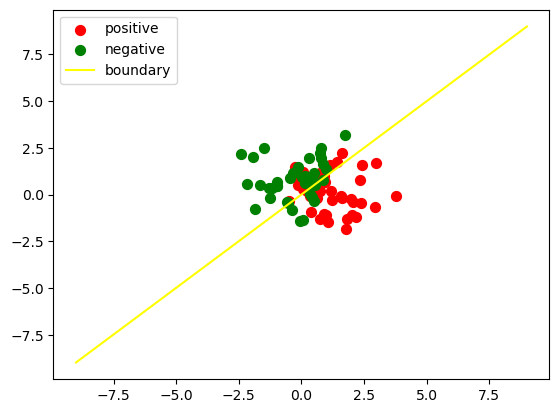

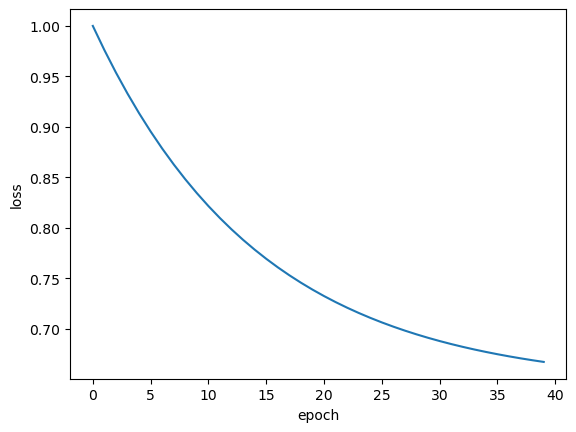

In [20]:
#数据生成
source_data=get_dataset(200,[1,0],[[1,0],[0,1]],[0,1],[[1,0],[0,1]],4,8,12)
#数据集划分
train_set=source_data[0:320]
test_set=source_data[320:]
#算法二
w2,loss=gradient_descent_mini_batch(train_set,0.01,False,1e-5,40,320)
print('下面测试算法二训练集')
eval(train_set,w2)
print('下面测试算法二测试集')
eval(test_set,w2)
print('算法二，训练集')
draw(train_set,np.array(w2))
print('算法二，测试集')
draw(test_set,np.array(w2))
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [21]:
import math
import numpy as np
import matplotlib.pyplot as plt
#下面两个函数分别计算函数值和梯度
def value(x):
    f=x*math.cos(0.25*math.pi*x)
    return f
def gradient(x,SGD=False):
    gradient=math.cos(0.25*math.pi*x)-0.25*math.pi*x*math.sin(0.25*math.pi*x)
    if SGD==True:
        gradient+=float(np.random.normal(0,1,1))
    return gradient

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


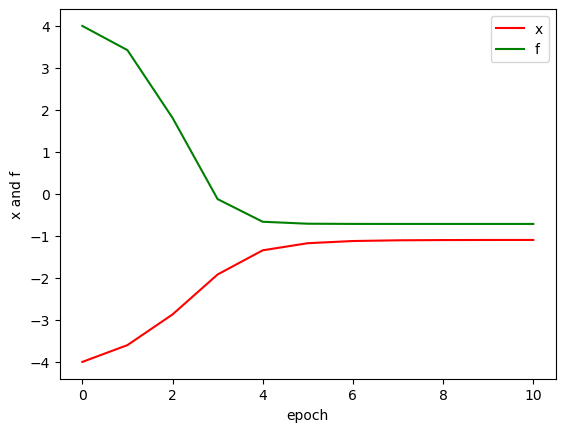

In [22]:
#梯度下降求解
def GD(initial=-4,max_iter=10,lr=0.4):
    x=initial
    f=value(x)
    x_all=[x]
    f_all=[f]
    for i in range(max_iter):
        grad=gradient(x)
        x=x-lr*grad
        f=value(x)
        x_all.append(x)
        f_all.append(f)
    epochs=[i for i in range(len(x_all))]
    print(epochs)
    plt.plot(epochs,x_all,color='r',label='x')
    plt.plot(epochs,f_all,color='g',label='f')
    plt.xlabel('epoch')
    plt.ylabel('x and f')
    plt.legend(loc=0)
GD(-4,10,0.4)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


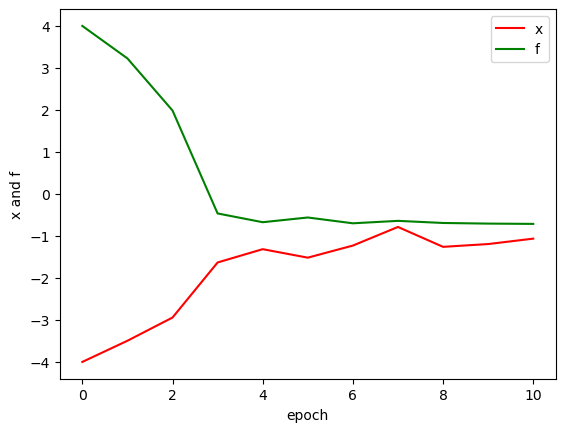

In [23]:
#随机梯度下降
def SGD(initial=-4,max_iter=10,lr=0.4):
    x=initial
    f=value(x)
    x_all=[x]
    f_all=[f]
    for i in range(max_iter):
        grad=gradient(x,True)
        x=x-lr*grad
        f=value(x)
        x_all.append(x)
        f_all.append(f)
    epochs=[i for i in range(len(x_all))]
    print(epochs)
    plt.plot(epochs,x_all,color='r',label='x')
    plt.plot(epochs,f_all,color='g',label='f')
    plt.xlabel('epoch')
    plt.ylabel('x and f')
    plt.legend(loc=0)
SGD(-4,10,0.4)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


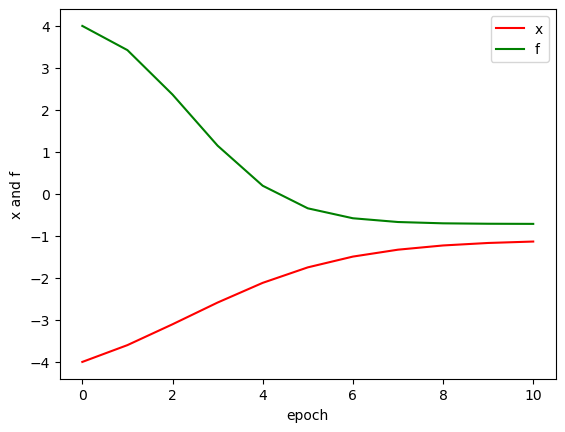

In [24]:
def Adagrad(initial=-4,max_iter=10,lr=0.4,epsilon=1e-6):
    x=initial
    f=value(x)
    x_all=[x]
    f_all=[f]
    grad_all=[]
    for i in range(max_iter):
        grad=gradient(x)
        grad_all.append(grad)
        sigma=float(np.linalg.norm(np.array(grad_all))/np.sqrt(len(grad_all)))+epsilon
        x=x-lr*grad/sigma
        f=value(x)
        x_all.append(x)
        f_all.append(f)
    epochs=[i for i in range(len(x_all))]
    print(epochs)
    plt.plot(epochs,x_all,color='r',label='x')
    plt.plot(epochs,f_all,color='g',label='f')
    plt.xlabel('epoch')
    plt.ylabel('x and f')
    plt.legend(loc=0)
Adagrad(-4,10,0.4,1e-6)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


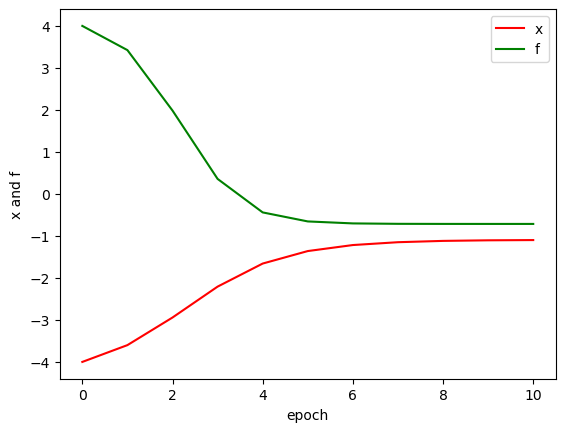

In [25]:
def RMS_prop(initial=-4,max_iter=10,lr=0.4,alpha=0.9):
    x=initial
    f=value(x)
    x_all=[x]
    f_all=[f]
    for i in range(max_iter):
        grad=gradient(x)
        if i==0:
            sigma=abs(grad)
        else:
            sigma=math.sqrt(alpha*(sigma**2)+(1-alpha)*(grad**2))
        x=x-lr*grad/sigma
        f=value(x)
        x_all.append(x)
        f_all.append(f)
    epochs=[i for i in range(len(x_all))]
    print(epochs)
    plt.plot(epochs,x_all,color='r',label='x')
    plt.plot(epochs,f_all,color='g',label='f')
    plt.xlabel('epoch')
    plt.ylabel('x and f')
    plt.legend(loc=0)
RMS_prop(-4,10,0.4,0.9)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


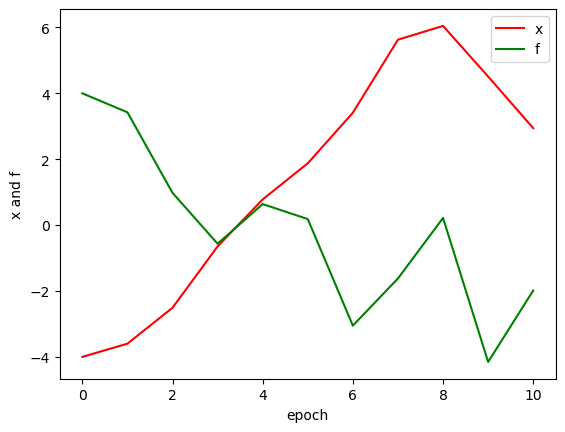

In [26]:
def momentum(initial=-4,max_iter=10,lr=0.4,lamd=0.9):
    x=initial
    f=value(x)
    x_all=[x]
    f_all=[f]
    m=0.0
    for i in range(max_iter):
        grad=gradient(x)
        m=lamd*m-lr*grad
        x=x+m
        f=value(x)
        x_all.append(x)
        f_all.append(f)
    epochs=[i for i in range(len(x_all))]
    print(epochs)
    plt.plot(epochs,x_all,color='r',label='x')
    plt.plot(epochs,f_all,color='g',label='f')
    plt.xlabel('epoch')
    plt.ylabel('x and f')
    plt.legend(loc=0)
momentum(-4,10,0.4,0.9)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


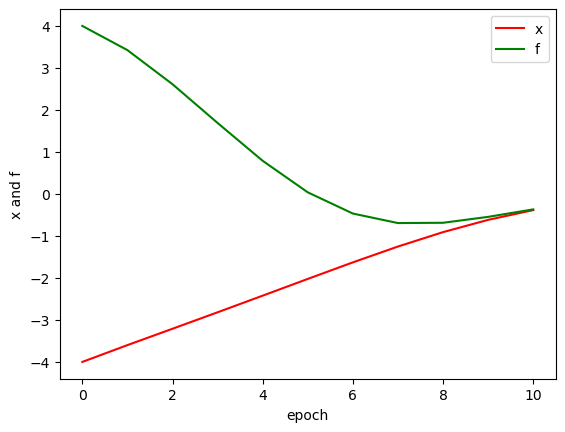

In [27]:
def Adam(initial=-4,max_iter=10,lr=0.4,beta1=0.9,beta2=0.999,epsilon=1e-6):
    x=initial
    f=value(x)
    x_all=[x]
    f_all=[f]
    m=0.0
    v=0.0
    for i in range(max_iter):
        grad=gradient(x)
        m=beta1*m+(1-beta1)*grad
        v=beta2*v+(1-beta2)*(grad**2)
        m_hat=m/(1-beta1**(i+1))
        v_hat=v/(1-beta2**(i+1))
        x=x-lr*m_hat/(math.sqrt(v_hat)+epsilon)
        f=value(x)
        x_all.append(x)
        f_all.append(f)
    epochs=[i for i in range(len(x_all))]
    print(epochs)
    plt.plot(epochs,x_all,color='r',label='x')
    plt.plot(epochs,f_all,color='g',label='f')
    plt.xlabel('epoch')
    plt.ylabel('x and f')
    plt.legend(loc=0)
Adam(-4,10,0.4,0.9,0.999,1e-6)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


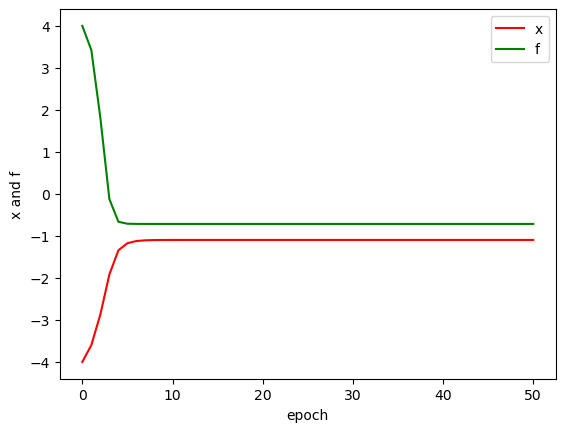

In [28]:
GD(max_iter=50)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


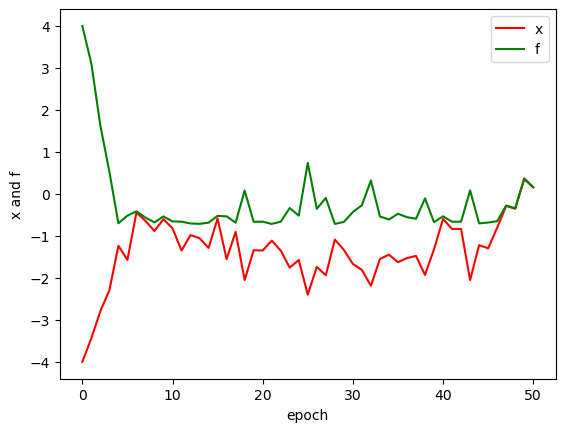

In [29]:
SGD(max_iter=50)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


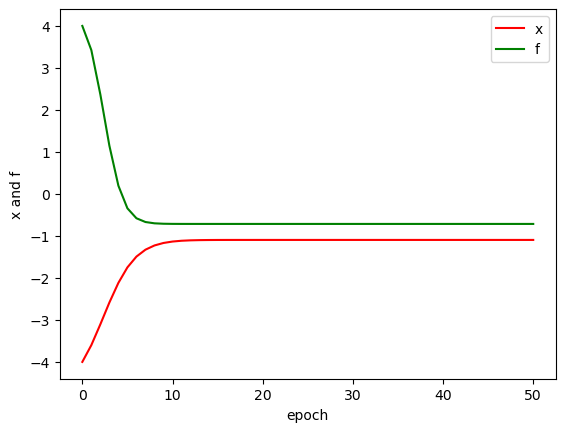

In [30]:
Adagrad(max_iter=50)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


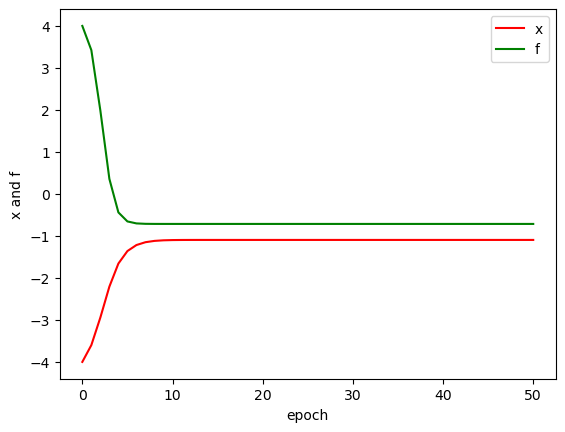

In [31]:
RMS_prop(max_iter=50)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


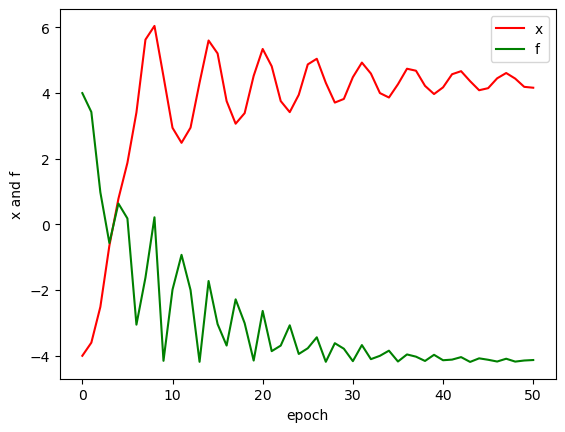

In [32]:
momentum(max_iter=50)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

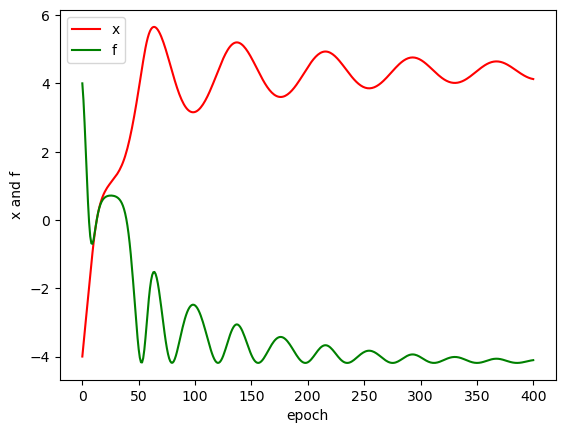

In [41]:
Adam(max_iter=400,beta1=0.99,lr=0.35)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


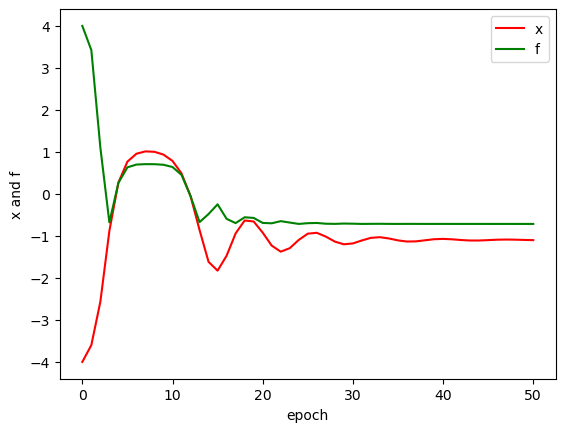

In [80]:
momentum(max_iter=50,lamd=0.76)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


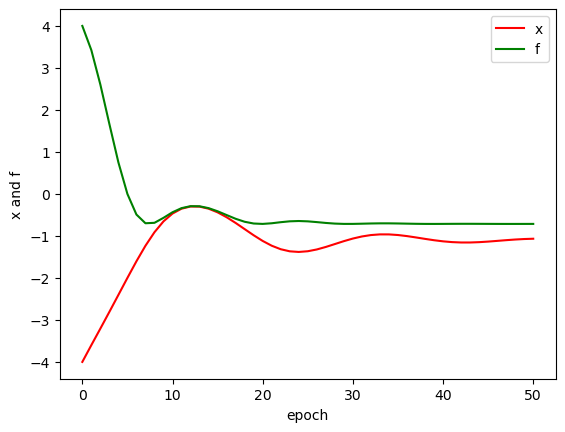

In [86]:
Adam(max_iter=50,beta1=0.84)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


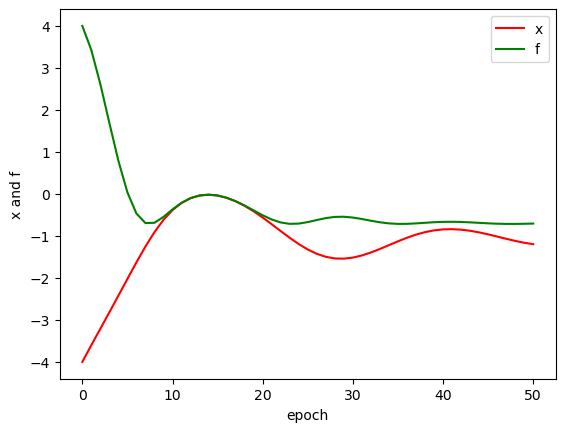

In [93]:
Adam(max_iter=50,beta2=0.99999)